In [18]:
import os
import pandas as pd
import numpy as np

In [19]:
# remove stumps

In [20]:
tree_data = pd.read_csv("cleaned_tree_data_5.csv", low_memory=False)
tree_data

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428.0,MONTICELLO ST,Stump,Stump,0.742804,0.240483,10.000000,2.000000,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,30.952599,8.833264,99.000000,99.000000,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.000000,6.000000,6.000000,3.000000,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.000000,10.000000,3.000000,3.000000,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135.0,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.000000,13.000000,99.000000,99.000000,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.000000,15.000000,58.537693,32.817887,NaN,...,Point Breeze North,9.0,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280
45341,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,23.267229,6.716901,52.409859,30.426761,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
45342,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,23.267229,6.716901,52.409859,30.426761,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095
45343,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,23.267229,6.716901,52.409859,30.426761,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062


In [21]:
tree_data = pd.read_csv("cleaned_tree_data_5.csv", low_memory=False)
tree_data = tree_data[~tree_data['common_name'].isin(['Stump', 'Vacant Site Large', 'Vacant Site Medium', 'Vacant Site Not Suitable', 'Vacant Site Small'])]
tree_data = tree_data.drop(labels= ['address_number', 'street', 'common_name'], axis = 1)

tree_benefits_by_neighborhood = tree_data[['neighborhood', 'stormwater_benefits_dollar_value', 'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value']].groupby('neighborhood').sum()
tree_count_by_neighborhood = tree_data[['neighborhood', 'id']].groupby('neighborhood').count().rename(columns={"id": "count"})

tree_info = tree_benefits_by_neighborhood.join(tree_count_by_neighborhood)

In [22]:
display(tree_info)

,stormwater_benefits_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value,count
neighborhood,,,,,
Allegheny Center,15178.511842,10723.002809,1370.216934,147912.809897,861
Allegheny West,5365.137916,3764.227070,484.084190,54863.154531,368
Allentown,526.717770,428.472504,53.256759,7227.077029,60
Arlington,390.847941,302.469775,38.234504,5894.342859,82
Arlington Heights,79.176047,43.677589,4.439313,873.886232,4
...,...,...,...,...,...
Upper Lawrenceville,2191.535869,1831.984740,249.098512,35840.965529,322
West End,525.474322,434.898748,62.622398,9164.610212,111
West Oakland,235.535630,196.237780,25.334219,5404.711449,71


<AxesSubplot:>

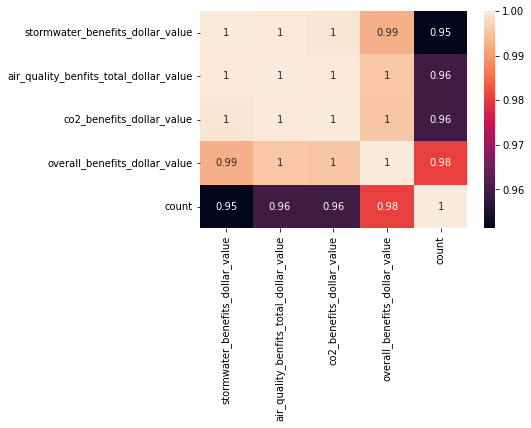

In [23]:
# normalize by area before
corrMatrix = tree_info.corr()
sns.heatmap(corrMatrix, annot=True)

In [24]:
# 2015 education data
# LINK: https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/12535b2e-6180-4cdf-b7d8-ec5294259e49

# load data
education_data = pd.read_csv("educational-attainment-for-the-population-25-years-and-over.csv")
# keep relevant columns
education_data = education_data[['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Regular high school diploma', 'Estimate; Total: - Bachelor\'s degree', 'Estimate; Total: - Master\'s degree']]

education_data["per_master"] = education_data['Estimate; Total: - Master\'s degree']/education_data['Estimate; Total:']
education_data["per_bachelor"] = education_data["per_master"] + education_data['Estimate; Total: - Bachelor\'s degree']/education_data['Estimate; Total:']
education_data["per_diploma"] = education_data["per_bachelor"] + education_data['Estimate; Total: - Regular high school diploma']/education_data['Estimate; Total:']

education_data = education_data.drop(labels = ['Estimate; Total:', 'Estimate; Total: - Regular high school diploma', 'Estimate; Total: - Bachelor\'s degree', 'Estimate; Total: - Master\'s degree'], axis = 1)
education_data = education_data.rename(columns={"Neighborhood": "neighborhood"}).groupby('neighborhood').sum()

In [25]:
display(education_data)

,per_master,per_bachelor,per_diploma
neighborhood,,,
Allegheny Center,0.079840,0.353293,0.469062
Allegheny West,0.112628,0.412969,0.535836
Allentown,0.022194,0.066582,0.433735
Arlington,0.019290,0.091821,0.409722
Arlington Heights,0.000000,0.000000,0.041322
...,...,...,...
Upper Lawrenceville,0.116909,0.379328,0.632213
West End,0.076923,0.263736,0.648352
West Oakland,0.096471,0.269412,0.458824


<AxesSubplot:>

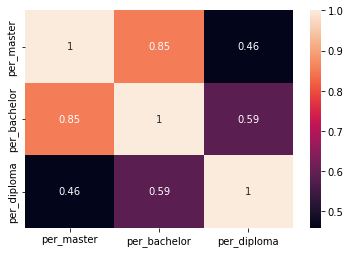

In [26]:
# double counting? 
import seaborn as sns
corrMatrix = education_data.corr()
sns.heatmap(corrMatrix, annot=True)

In [27]:
# 2010 area data
# LINK: https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6

area_data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv")[['Neighborhood_2010_HOOD', 'Neighborhood_2010_AREA', 'Pop__2010', 'Est__Pop__Under_Poverty__2010_', 'SNAP_All_csv_Residential', 'SNAP_All_csv_Mixed_Use___Indust', 'SNAP_All_csv_Mixed_Use___Commer', 'SNAP_All_csv_Median_Home__Value', 'SNAP_All_csv_Landslide_Prone___']]
area_data = area_data.rename(columns={"Neighborhood_2010_AREA": "neighborhood_area", 
                                      "Pop__2010":"population_2010", 
                                      "Est__Pop__Under_Poverty__2010_":"population_under_poverty_2010", 
                                      'SNAP_All_csv_Residential':"per_residential_area", 
                                      'SNAP_All_csv_Mixed_Use___Indust':"per_industrial_area", 
                                      'SNAP_All_csv_Mixed_Use___Commer':"per_commercial_area", 
                                      'Neighborhood_2010_HOOD':"neighborhood",
                                      'SNAP_All_csv_Median_Home__Value':"median_home_value",
                                      'SNAP_All_csv_Landslide_Prone___':"landslide_prone"})

numeric_data = ['per_residential_area', 'per_commercial_area', 'per_industrial_area', 'median_home_value', 'landslide_prone']
for i in numeric_data:
    area_data[i] = area_data[i].str.replace(r'[^\d\.]+', '', regex = True).astype(float)

area_data['per_population_under_poverty_2010'] = area_data['population_under_poverty_2010']/area_data['population_2010']
area_data['population_density'] = area_data['population_2010']/area_data['neighborhood_area']

area_data = area_data.groupby('neighborhood').sum()


In [28]:
display(area_data)

,neighborhood_area,population_2010,population_under_poverty_2010,per_residential_area,per_industrial_area,per_commercial_area,median_home_value,landslide_prone,per_population_under_poverty_2010,population_density
neighborhood,,,,,,,,,,
Allegheny Center,5840713.0,933,324,0.0,0.0,49.4,136300.0,0.0,0.347267,0.000160
Allegheny West,3938870.2,462,12,42.1,6.3,12.5,123600.0,9.3,0.025974,0.000117
Allentown,8221419.5,2500,630,54.6,0.0,9.3,42200.0,27.1,0.252000,0.000304
Arlington,13108599.0,1869,361,43.7,10.9,3.8,44200.0,41.4,0.193151,0.000143
Arlington Heights,3667921.5,244,169,56.5,0.0,0.0,64400.0,39.9,0.692623,0.000067
...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,11288746.0,2669,722,24.4,53.0,9.1,48700.0,13.9,0.270513,0.000236
West End,5579501.0,254,0,0.8,16.3,29.2,29800.0,16.8,0.000000,0.000046
West Oakland,5999801.5,2604,758,25.5,0.0,3.9,61100.0,64.5,0.291091,0.000434


<AxesSubplot:>

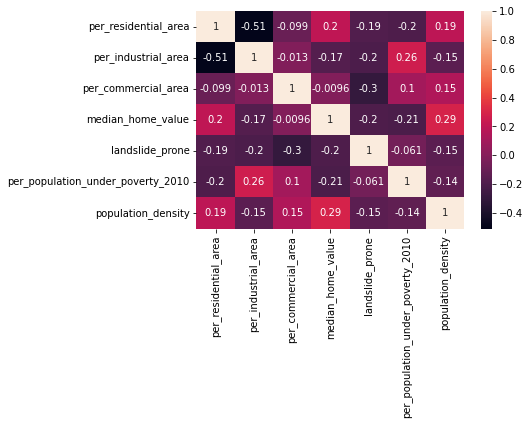

In [29]:
corrMatrix = area_data.drop(labels = ['neighborhood_area', 'population_2010', 'population_under_poverty_2010'], axis = 1).corr()
sns.heatmap(corrMatrix, annot=True)

In [30]:
complete_data = tree_info.join(education_data).join(area_data)
for i in ['stormwater_benefits_dollar_value', 'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value', 'count']:
    complete_data['area_norm_' + i] = complete_data[i] * 10000/complete_data['neighborhood_area']

In [31]:
display(complete_data)

,stormwater_benefits_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value,count,per_master,per_bachelor,per_diploma,neighborhood_area,population_2010,...,per_commercial_area,median_home_value,landslide_prone,per_population_under_poverty_2010,population_density,area_norm_stormwater_benefits_dollar_value,area_norm_air_quality_benfits_total_dollar_value,area_norm_co2_benefits_dollar_value,area_norm_overall_benefits_dollar_value,area_norm_count
neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,15178.511842,10723.002809,1370.216934,147912.809897,861,0.079840,0.353293,0.469062,5840713.0,933,...,49.4,136300.0,0.0,0.347267,0.000160,25.987430,18.359065,2.345975,253.244441,1.474135
Allegheny West,5365.137916,3764.227070,484.084190,54863.154531,368,0.112628,0.412969,0.535836,3938870.2,462,...,12.5,123600.0,9.3,0.025974,0.000117,13.621007,9.556616,1.228992,139.286526,0.934278
Allentown,526.717770,428.472504,53.256759,7227.077029,60,0.022194,0.066582,0.433735,8221419.5,2500,...,9.3,42200.0,27.1,0.252000,0.000304,0.640665,0.521166,0.064778,8.790546,0.072980
Arlington,390.847941,302.469775,38.234504,5894.342859,82,0.019290,0.091821,0.409722,13108599.0,1869,...,3.8,44200.0,41.4,0.193151,0.000143,0.298161,0.230741,0.029167,4.496547,0.062554
Arlington Heights,79.176047,43.677589,4.439313,873.886232,4,0.000000,0.000000,0.041322,3667921.5,244,...,0.0,64400.0,39.9,0.692623,0.000067,0.215861,0.119080,0.012103,2.382511,0.010905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,2191.535869,1831.984740,249.098512,35840.965529,322,0.116909,0.379328,0.632213,11288746.0,2669,...,9.1,48700.0,13.9,0.270513,0.000236,1.941346,1.622842,0.220661,31.749289,0.285240
West End,525.474322,434.898748,62.622398,9164.610212,111,0.076923,0.263736,0.648352,5579501.0,254,...,29.2,29800.0,16.8,0.000000,0.000046,0.941794,0.779458,0.112237,16.425502,0.198943
West Oakland,235.535630,196.237780,25.334219,5404.711449,71,0.096471,0.269412,0.458824,5999801.5,2604,...,3.9,61100.0,64.5,0.291091,0.000434,0.392572,0.327074,0.042225,9.008150,0.118337


In [32]:
subset_data = complete_data[['per_diploma', 'per_bachelor',
                             'per_master', 'per_residential_area',
                             'per_industrial_area', 'per_commercial_area', 'median_home_value',
                             'landslide_prone', 'per_population_under_poverty_2010',
                             'area_norm_overall_benefits_dollar_value', 'area_norm_count', 'population_density']]

<AxesSubplot:>

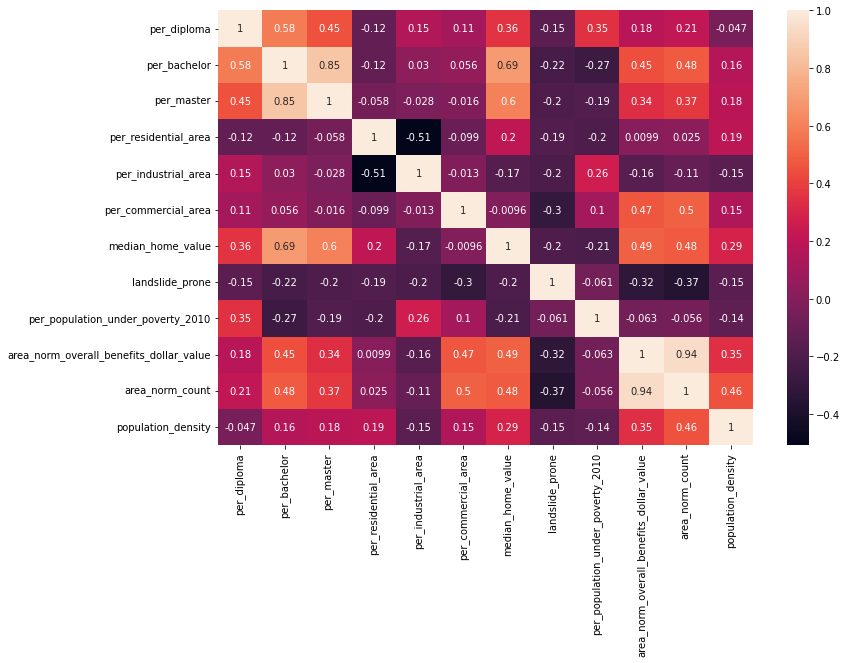

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8)) 

corrMatrix = subset_data.corr()
sns.heatmap(corrMatrix, annot=True)

In [34]:
import seaborn as sns

In [40]:
for i in complete_data.columns:
    print('| ' + i + ' | ')

| stormwater_benefits_dollar_value | 
| air_quality_benfits_total_dollar_value | 
| co2_benefits_dollar_value | 
| overall_benefits_dollar_value | 
| count | 
| per_master | 
| per_bachelor | 
| per_diploma | 
| neighborhood_area | 
| population_2010 | 
| population_under_poverty_2010 | 
| per_residential_area | 
| per_industrial_area | 
| per_commercial_area | 
| median_home_value | 
| landslide_prone | 
| per_population_under_poverty_2010 | 
| population_density | 
| area_norm_stormwater_benefits_dollar_value | 
| area_norm_air_quality_benfits_total_dollar_value | 
| area_norm_co2_benefits_dollar_value | 
| area_norm_overall_benefits_dollar_value | 
| area_norm_count | 


| Column Name |
| --- | 
| stormwater_benefits_dollar_value | 
| air_quality_benfits_total_dollar_value | 
| co2_benefits_dollar_value | 
| overall_benefits_dollar_value | 
| count | 
| per_master | 
| per_bachelor | 
| per_diploma | 
| neighborhood_area | 
| population_2010 | 
| population_under_poverty_2010 | 
| per_residential_area | 
| per_industrial_area | 
| per_commercial_area | 
| median_home_value | 
| landslide_prone | 
| per_population_under_poverty_2010 | 
| population_density | 
| area_norm_stormwater_benefits_dollar_value | 
| area_norm_air_quality_benfits_total_dollar_value | 
| area_norm_co2_benefits_dollar_value | 
| area_norm_overall_benefits_dollar_value | 
| area_norm_count | 

| Syntax      | Description | Test Text     |
| :---        |    :----:   |          ---: |
| Header      | Title       | Here's this   |
| Paragraph   | Text        | And more      |

#### Median Home Value

[Text(0.5, 0, 'Median Home Value ($)'),
 Text(0.5, 1.0, 'Distibution of Median Home Value Across Neighborhoods in Pittsburgh')]

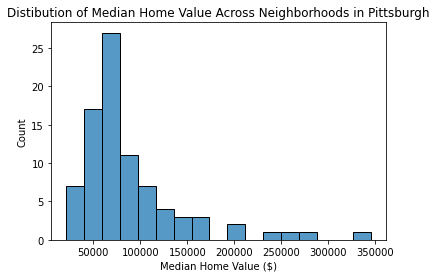

In [310]:
home_value_data = complete_data[['median_home_value', 'area_norm_count', 'area_norm_overall_benefits_dollar_value']]
# remove rows where median_home_value is 0
home_value_data = home_value_data[home_value_data['median_home_value'] != 0]

# plot distribution of median_home_value
plot = sns.histplot(home_value_data['median_home_value'])
plot.set(xlabel = "Median Home Value ($)", title = "Distibution of Median Home Value Across Neighborhoods in Pittsburgh")

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Median Home Value ($)'),
 Text(0.5, 1.0, 'Relationship between Median Home Value and Number of Trees \nin Neighborhoods across Pittsburgh')]

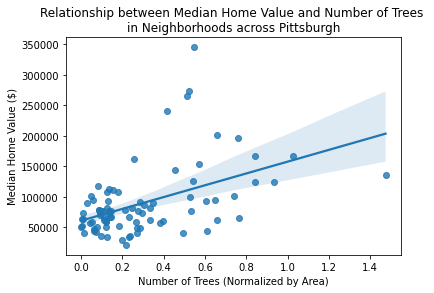

In [311]:
plot = sns.regplot(x = 'area_norm_count', y = 'median_home_value', data = home_value_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Median Home Value ($)", 
         title = "Relationship between Median Home Value and Number of Trees \nin Neighborhoods across Pittsburgh")

[Text(0.5, 0, 'Trees Benefits (Normalized by Area)'),
 Text(0, 0.5, 'Median Home Value ($)')]

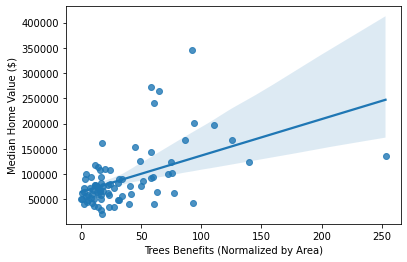

In [312]:
plot = sns.regplot(x = 'area_norm_overall_benefits_dollar_value', y = 'median_home_value', data = home_value_data)
plot.set(xlabel = "Trees Benefits (Normalized by Area)", ylabel = "Median Home Value ($)")


#### Population Density

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Population Density'),
 Text(0.5, 1.0, 'Population Density vs Number of Trees')]

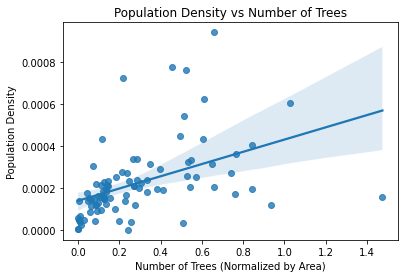

In [313]:
plot = sns.regplot(x = 'area_norm_count', y = 'population_density', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Population Density",
         title = "Population Density vs Number of Trees")


#### Industrial Areas and Trees

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Percentage Industrial Area'),
 Text(0.5, 1.0, 'Percentage Industrial Area vs Number of Trees')]

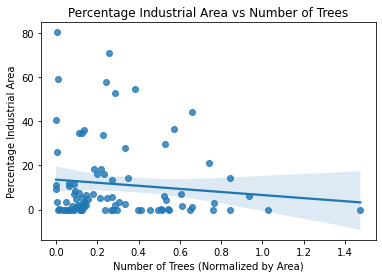

In [316]:
plot = sns.regplot(x = 'area_norm_count', y = 'per_industrial_area', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Percentage Industrial Area",
         title = "Percentage Industrial Area vs Number of Trees")


#### Commercial Areas and Trees

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Percentage Commercial Area'),
 Text(0.5, 1.0, 'Percentage Commercial Area vs Number of Trees')]

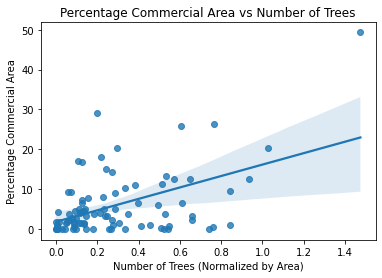

In [315]:
plot = sns.regplot(x = 'area_norm_count', y = 'per_commercial_area', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Percentage Commercial Area",
         title = "Percentage Commercial Area vs Number of Trees")


In [ ]:
# education against tree benefits